# Laden der Module und Bibliotheken

In [1]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Daten Einlesen

In [2]:
PATH = 'data/House/'
data = pd.read_csv(f'{PATH}train.csv')
df_test = pd.read_csv(f'{PATH}test.csv')

# Einen Überblick über die Daten bekommen

In [3]:
data.head().T, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

(                     0        1        2        3        4
 Id                   1        2        3        4        5
 MSSubClass          60       20       60       70       60
 MSZoning            RL       RL       RL       RL       RL
 LotFrontage         65       80       68       60       84
 LotArea           8450     9600    11250     9550    14260
 Street            Pave     Pave     Pave     Pave     Pave
 Alley              NaN      NaN      NaN      NaN      NaN
 LotShape           Reg      Reg      IR1      IR1      IR1
 LandContour        Lvl      Lvl      Lvl      Lvl      Lvl
 Utilities       AllPub   AllPub   AllPub   AllPub   AllPub
 LotConfig       Inside      FR2   Inside   Corner      FR2
 LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl
 Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge
 Condition1        Norm    Feedr     Norm     Norm     Norm
 Condition2        Norm     Norm     Norm     Norm     Norm
 BldgType          1Fam     1Fam     1Fa

# Datentypen

Objekt Datentypen in Categorische Datentypen umwandeln

In [4]:
data.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [5]:
cat_vars = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

contin_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

objective= ['SalePrice']

ids = ['Id']

for v in cat_vars: 
    data[v] = data[v].astype('category').cat.as_ordered()

apply_cats(df_test,data)

# Fehlende Daten

Fehlende felder bei durchgängigen Variablen mit null ersetzen 
und in Datentyp float umwandeln

In [6]:
for v in contin_vars: 
    data[v] = data[v].fillna(0).astype('float32')
for v in contin_vars: 
    df_test[v] = df_test[v].fillna(0).astype('float32')

# Dataframe in Trainingsdaten und Label trennen

In [7]:
data = data.set_index('Id')
data = data[cat_vars+contin_vars+objective]

df, y, nas, mapper = proc_df(data,'SalePrice',do_scale=True)

df_test = df_test.set_index('Id')
df_test['SalePrice'] = 0
df_test = df_test[cat_vars+contin_vars+objective]

df_test, _, nas, mapper = proc_df(df_test,'SalePrice',do_scale=True, mapper=mapper,na_dict=nas)

# Die Zielvariable betrachten

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(count      1460.000000
 mean     180921.195890
 std       79442.502883
 min       34900.000000
 25%      129975.000000
 50%      163000.000000
 75%      214000.000000
 max      755000.000000
 Name: SalePrice, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7957388eb8>)

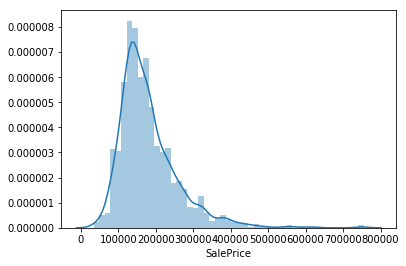

In [8]:
data['SalePrice'].describe(), sns.distplot(data['SalePrice'])

Abhängige variable 'SalePrice' logamitrieren

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


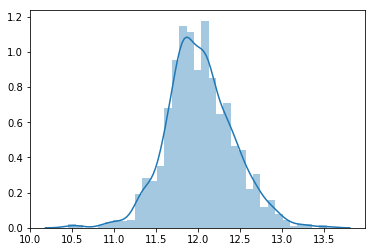

In [9]:
yl = np.log(y)
sns.distplot(yl)

# Bewertung des Machine-learning Models

Metric definieren und variablen in Trainings und Validierungsset aufteilen

In [10]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res=[rmse(m.predict(X_train),y_train), 
         rmse(m.predict(X_valid),y_valid),
         m.score(X_train,y_train),
         m.score(X_valid,y_valid)]
    print(res)

    
def split_vals(a,n):
    return a[:n],a[n:]

n_valid = int(len(df)*0.2)
n_trn = len(df)-n_valid
X_train, X_valid = split_vals(df,n_trn)
y_train, y_valid = split_vals(yl,n_trn)
raw_train, raw_valid = split_vals(data, n_trn)

# Das Model

In [11]:
m = RandomForestRegressor(n_estimators=100,min_samples_split=2, min_samples_leaf=2,max_features=0.5)
m.fit(X_train,y_train)
print_score(m)

[0.06535765059001554, 0.14587370199645477, 0.9734767294822536, 0.8608858542092401]


# Featurewichtigkeit

Featurewichtigkeit berechnen

In [12]:
fe_imp = rf_feat_importance(m,df)
fe_imp[:30]

,cols,imp
46,OverallQual,0.304174
58,GrLivArea,0.174944
48,YearBuilt,0.095249
18,ExterQual,0.049759
54,TotalBsmtSF,0.048840
69,GarageArea,0.037856
55,1stFlrSF,0.031003
68,GarageCars,0.027665
51,BsmtFinSF1,0.020261
61,FullBath,0.017919


Featurewichtigkeit plotten

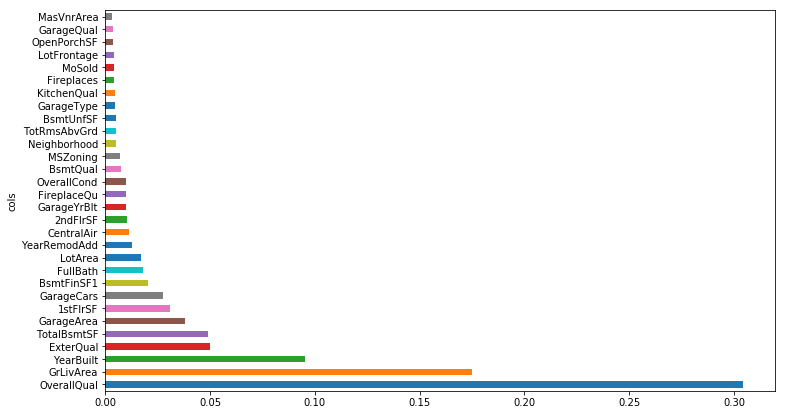

In [13]:
def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fe_imp[0:30]);

Unwichtige Features raus nehmen um die Featurewichtigkeiten klarer heraus zu stellen

In [14]:
to_keep = fe_imp[fe_imp.imp>0.001].cols; len(to_keep)
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=100,min_samples_split=2, min_samples_leaf=2,max_features=0.5)
m.fit(X_train,y_train)
print_score(m)

[0.0650205976353843, 0.14316841185443885, 0.9737495879841831, 0.8659978708480939]


Erneut die Featurewichtigkeit betrachten

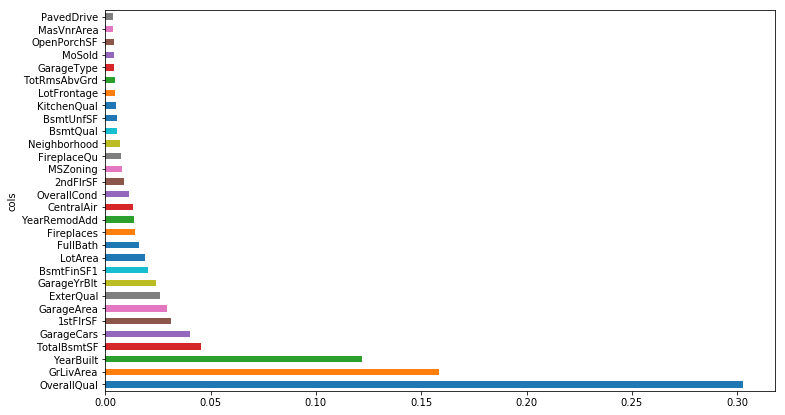

In [15]:
fe_imp = rf_feat_importance(m,df_keep)
fe_imp[:30],
plot_fi(fe_imp[0:30]);

# Grid search

In [16]:
# grid search initiieren
from sklearn.metrics import make_scorer
rmse_score = make_scorer(rmse)
m = RandomForestRegressor()

params={
    'n_estimators': [10,30,90,180,250],
    'min_samples_leaf': range(1,3),
    'min_samples_split': [2,3,4],
    'max_features':[0.5,'sqrt','log2',1]
}

In [17]:
# grid search durchführen 
params={
    'n_estimators': [180],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'max_features':[0.5]
}
gs = GridSearchCV(m,params,scoring = rmse_score)
gs.fit(X_train,y_train)
gs.best_params_

{'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 180}

In [18]:
# Random forrest mit den besten parametern
m = RandomForestRegressor(n_estimators=180,min_samples_split=2, min_samples_leaf=1,max_features=0.5)
m.fit(X_train,y_train)
print_score(m)

[0.05253657712666442, 0.1431459896251269, 0.9828620939145233, 0.8660398408768927]


# Fertiges Model

Unser Model mit den optimalen Parametern noch einmal mit dem gesamte Datenset trainieren.
(Trainingsset so wie Validierungsset)

In [38]:
df_final = df[to_keep].copy()
df_test = df_test[to_keep].copy()
m = RandomForestRegressor(n_estimators=180,min_samples_split=2, min_samples_leaf=1,
                          max_features=0.5)
m.fit(df_final,yl)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Ergebnisse in CSV File abspeichern

In [31]:
preds = m.predict(df_test)
preds = np.exp(preds)
sample_submission = pd.read_csv(f'{PATH}sample_submission.csv')
sample_submission.head()
sample_submission['SalePrice'] = preds
sample_submission.head()

,Id,SalePrice
0,1461,124566.158348
1,1462,149280.363331
2,1463,176817.064954
3,1464,181670.476314
4,1465,188358.640016


In [ ]:
#sample_submission.to_csv('submission1.csv', index=False)